In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.0 MB/s eta 0:00:005.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os

In [4]:
filepath = "../../../AVA-AVD/dataset_ava/videos/20TAGRElvfE.mp4"

In [5]:
os.path.isfile(filepath)

False

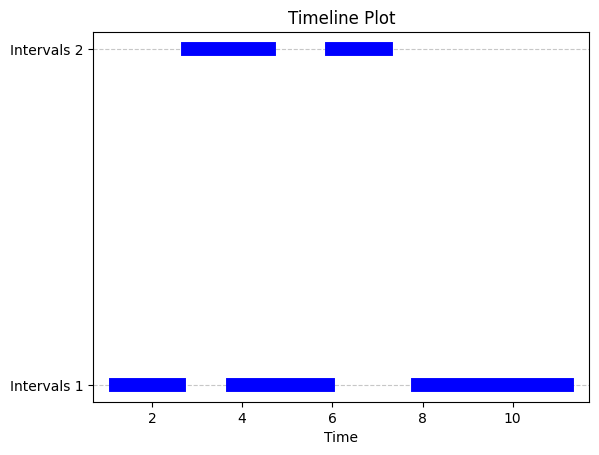

In [2]:
import matplotlib.pyplot as plt

def plot_timeline(intervals, label):
    for start, end in intervals:
        plt.plot([start, end], [label, label], color='blue', linewidth=10)

# Intervals
intervals1 = [(1.2, 2.6), (3.8, 5.9), (7.9, 11.2)]
intervals2 = [(2.8, 4.6), (6.0, 7.2)]

# Plot timelines
plot_timeline(intervals1, 1)
plot_timeline(intervals2, 2)

# Customize the plot
plt.xlabel('Time')
plt.yticks([1, 2], ['Intervals 1', 'Intervals 2'])
plt.title('Timeline Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

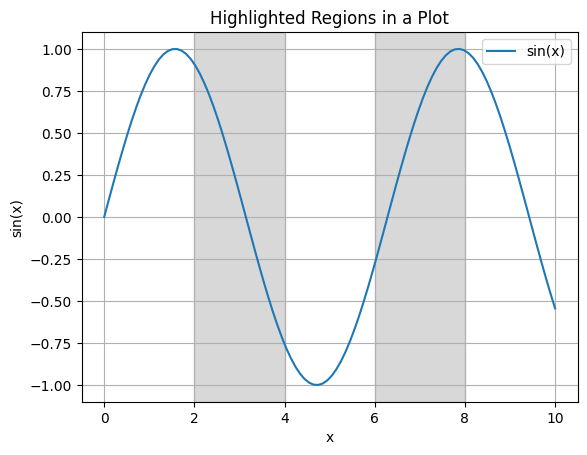

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot the data
plt.plot(x, y, label='sin(x)')

# Highlighting regions
highlight_regions = [(2, 4), (6, 8)]  # Example regions to highlight

for region in highlight_regions:
    plt.axvspan(region[0], region[1], color='gray', alpha=0.3)  # Add vertical shaded region

# Add labels, title, legend, etc.
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Highlighted Regions in a Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

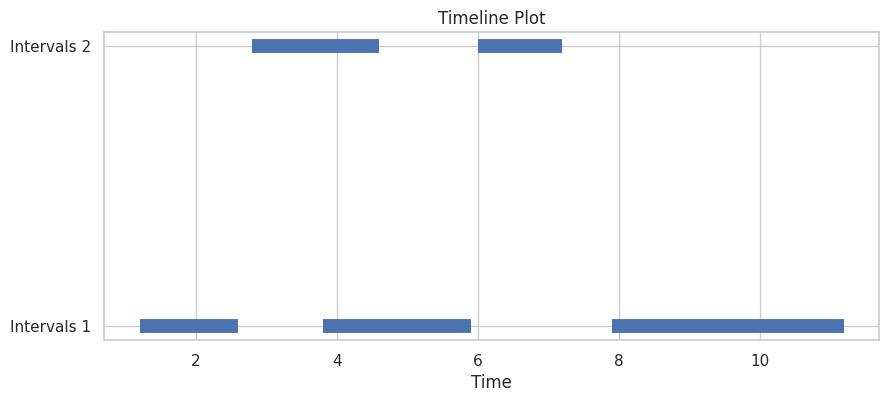

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_timeline(intervals, label):
    for start, end in intervals:
        plt.hlines(label, start, end, linewidth=10)

# Intervals
intervals1 = [(1.2, 2.6), (3.8, 5.9), (7.9, 11.2)]
intervals2 = [(2.8, 4.6), (6.0, 7.2)]

# Create a Seaborn plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 4))

# Plot timelines
plot_timeline(intervals1, 1)
plot_timeline(intervals2, 2)

# Customize the plot
plt.xlabel('Time')
plt.yticks([1, 2], ['Intervals 1', 'Intervals 2'])
plt.title('Timeline Plot')

# Show the plot
plt.show()


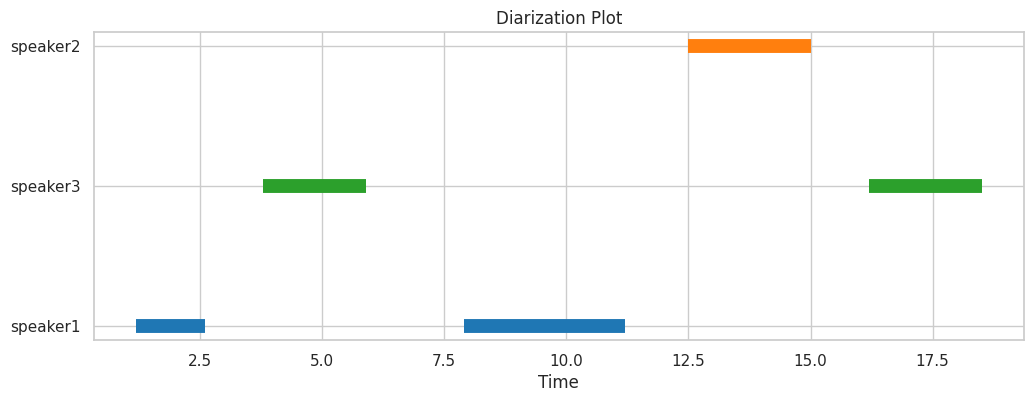

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_diarization(intervals, labels):
    cmap = plt.get_cmap('tab10')  # Choose a colormap, e.g., 'tab10'
    unique_labels = set(labels)
    label_to_color = {label: cmap(i) for i, label in enumerate(unique_labels)}

    for (start, end), label in zip(intervals, labels):
        plt.hlines(label, start, end, color=label_to_color[label], linewidth=10)

# Intervals and corresponding labels
intervals = [(1.2, 2.6), (3.8, 5.9), (7.9, 11.2), (12.5, 15.0), (16.2, 18.5)]
labels = ['speaker1', 'speaker2', 'speaker1', 'speaker3', 'speaker2']

# Create a colorful diarization plot
plt.figure(figsize=(12, 4))

# Plot diarization
plot_diarization(intervals, labels)

# Customize the plot
plt.xlabel('Time')
plt.yticks(range(len(set(labels))), set(labels))
plt.title('Diarization Plot')

# Show the plot
plt.show()


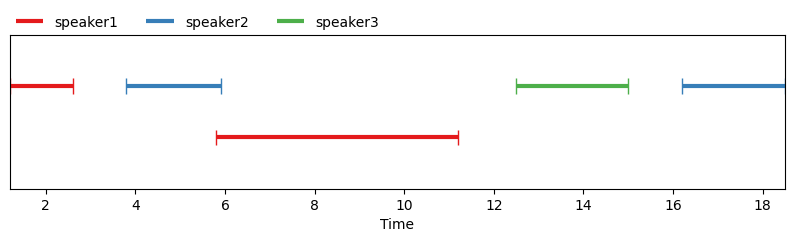

In [6]:
from pyannote.core import Segment, Annotation
from pyannote.core import notebook
import matplotlib.pyplot as plt

# Create a custom diarization result
custom_diarization = Annotation()
custom_diarization[Segment(1.2, 2.6)] = 'speaker1'
custom_diarization[Segment(3.8, 5.9)] = 'speaker2'
custom_diarization[Segment(5.8, 11.2)] = 'speaker1'
custom_diarization[Segment(12.5, 15.0)] = 'speaker3'
custom_diarization[Segment(16.2, 18.5)] = 'speaker2'

# Create a figure
fig, ax = plt.subplots(figsize=(10, 2))

# Plot the custom diarization result
notebook.plot_annotation(custom_diarization, ax, legend=True)

# Customize the plot (if needed)
ax.set_xlabel('Time')
ax.set_yticks([])  # To hide the y-axis

# Save the figure
fig.savefig('custom_diarization_plot.png', bbox_inches='tight')

# Show the figure (optional)
plt.show()

In [1]:
import json
with open('output.json', 'r') as json_file:
    loaded_list = json.load(json_file)

In [2]:
loaded_list[0]

[{'track': 0,
  'score': -1.0666666825612385,
  's': 72.29749870300293,
  'x': 106.30376434326172,
  'y': 88.0403003692627},
 {'track': 1,
  'score': 2.3999999364217124,
  's': 68.65208148956299,
  'x': 510.92138671875,
  'y': 60.32396221160889},
 {'track': 2,
  'score': -1.2000000476837158,
  's': 40.90107727050781,
  'x': 299.64306640625,
  'y': 30.711134910583496}]

In [15]:
def convert_to_ranges(lst):
    ranges = []
    start = lst[0]
    
    for i in range(1, len(lst)):
        if lst[i] - lst[i-1] > 0.08:
            ranges.append((start, lst[i-1]))
            start = lst[i]

    # Add the last range
    ranges.append((start, lst[-1]))

    return ranges

In [16]:
tracks = {}
for count, item in enumerate(loaded_list):
    for track in item:
        if track["score"] > 0:
            if track["track"] in tracks.keys():
                tracks[track["track"]].append(count/25)
            else:
                tracks[track["track"]] = [count/25]

for key in tracks.keys():
    tracks[key] = convert_to_ranges(tracks[key])

In [17]:
tracks

{1: [(0.0, 17.88)], 6: [(17.04, 17.76)], 2: [(18.84, 19.68), (19.76, 19.96)]}

In [7]:
convert_to_ranges(tracks[1])

[(0.0, 17.88)]

In [6]:
import numpy as np
import pickle

In [3]:
item1 = {1: [np.array([1.2, 2.4, 1.2])], 2: [np.array([1.2, 2.4, 1.2])]}
item2 = [np.array([1.2, 2.4, 1.2]), np.array([1.2, 2.4, 1.2])]

In [5]:
item2

[array([1.2, 2.4, 1.2]), array([1.2, 2.4, 1.2])]

In [7]:
with open('data1.pkl', 'wb') as pickle_file:
    pickle.dump(item1, pickle_file)
with open('data2.pkl', 'wb') as pickle_file:
    pickle.dump(item2, pickle_file)

In [8]:
with open('data1.pkl', 'rb') as pickle_file:
    item1 = pickle.load(pickle_file)
with open('data2.pkl', 'rb') as pickle_file:
    item2 = pickle.load(pickle_file)

In [6]:
import pickle
with open('TalkNet-ASD/Videos/001/pywork/scores.pckl', 'rb') as pickle_file:
    item2 = pickle.load(pickle_file)

In [14]:
for num, item in enumerate(item1):
    print(num)
    print(item.shape)
    print(item.size)
    print(item[0])
    print(item[-1])

0
(492,)
492
-1.100000023841858
-1.2999999523162842
1
(499,)
499
1.399999976158142
-1.899999976158142
2
(499,)
499
-1.2000000476837158
0.30000001192092896
3
(15,)
15
-1.399999976158142
-1.100000023841858
4
(100,)
100
-0.5
-0.699999988079071
5
(36,)
36
-0.800000011920929
-1.2000000476837158
6
(28,)
28
0.4000000059604645
-0.6000000238418579


In [15]:
for num, item in enumerate(item2):
    print(num)
    print(item.shape)
    print(item.size)
    print(item[0])
    print(item[-1])

0
(492,)
492
-1.100000023841858
-1.2999999523162842
1
(499,)
499
1.399999976158142
-1.899999976158142
2
(499,)
499
-1.2000000476837158
0.30000001192092896
3
(15,)
15
-1.399999976158142
-1.100000023841858
4
(100,)
100
-0.5
-0.699999988079071
5
(36,)
36
-0.800000011920929
-1.2000000476837158
6
(28,)
28
0.4000000059604645
-0.6000000238418579


In [2]:
def create_webvtt_file(sentences, sentence_timestamps, word_timestamps):
    webvtt_content = "WEBVTT\n\n"

    for i, sentence in enumerate(sentences):
        webvtt_content += f"{i+1}\n"
        webvtt_content += f"{sentence_timestamps[i]} --> {sentence_timestamps[i+1]}\n"
        webvtt_content += f"{sentence}\n\n"

        for word in sentence.split():
            webvtt_content += f"<v {word_timestamps[word]}>{word}</v> "

        webvtt_content += "\n\n"

    with open("../../Clips/Set 2/zzz.vtt", "w") as file:
        file.write(webvtt_content)

In [ ]:
# Example usage
sentences = ["Hello world!", "This is a test sentence."]
sentence_timestamps = ["00:00:00.000", "00:00:02.500", "00:00:03.500"]
word_timestamps = {
    "Hello": "00:00:00.000 --> 00:00:01.000",
    "world!": "00:00:01.000 --> 00:00:02.500",
    "This": "00:00:02.500 --> 00:00:03.000",
    "is": "00:00:03.000 --> 00:00:03.500",
    "a": "00:00:03.500 --> 00:00:04.000",
    "test": "00:00:04.000 --> 00:00:04.500",
    "sentence.": "00:00:04.500 --> 00:00:05.000"
}

def create_vtt(sentences, sentence_timestamps, word_timestamps):
    vtt = "WEBVTT\n\n"
    for i, sentence in enumerate(sentences):
        vtt += f"{i+1}\n{sentence_timestamps[i]}\n"
        words = sentence.split()
        for word in words:
            vtt += f"{word_timestamps[word]}\n{word}\n"
        vtt += "\n"

    with open("../../Clips/Set 2/zzz.vtt", "w") as f:
        f.write(vtt)
    return vtt


In [3]:
# Example usage
sentences = ["Hello world!", "This is a test sentence."]
sentence_timestamps = ["00:00:00.000", "00:00:02.500", "00:00:03.500"]
word_timestamps = {
    "Hello": "00:00:00.000 --> 00:00:01.000",
    "world!": "00:00:01.000 --> 00:00:02.500",
    "This": "00:00:02.500 --> 00:00:03.000",
    "is": "00:00:03.000 --> 00:00:03.500",
    "a": "00:00:03.500 --> 00:00:04.000",
    "test": "00:00:04.000 --> 00:00:04.500",
    "sentence.": "00:00:04.500 --> 00:00:05.000"
}

create_webvtt_file(sentences, sentence_timestamps, word_timestamps)


In [11]:
import pickle
import pandas as pd

In [70]:
temp3 = pickle.load(open(
    "/home/sunil/projects/Stuff/Combined/WhoSaidThat/output/video_temp/zzz_PiersMorgan_1_165_368/pywork/encoding_df.pckl",
    "rb"))
temp3.iloc[0]

Frame                                                      12
Track                                                       1
Score                                                    0.02
S                                                   66.492874
X                                                   69.461155
Y                                                   294.38286
Encoding    [-0.05850093811750412, 0.07135837525129318, 0....
Name: 0, dtype: object

In [73]:
temp = pickle.load(open(
    "/home/sunil/projects/Stuff/Combined/WhoSaidThat/output/video_temp/zzz_PiersMorgan_1_165_368/pywork/tracks.pckl",
    "rb"))
temp[1]

{'track': {'frame': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20]),
  'bbox': array([[ 46.26395416, 224.18106079, 131.21705627, 355.93267822],
         [ 46.30734253, 224.41471863, 131.29312134, 356.23800659],
         [ 46.25149155, 224.49363708, 131.28684998, 356.25268555],
         [ 45.03621674, 224.52853394, 130.24519348, 357.13500977],
         [ 44.31567192, 224.40300751, 129.18073273, 356.35063171],
         [ 43.59512711, 224.27748108, 128.11627197, 355.56625366],
         [ 41.66931763, 225.1098999 , 126.00452271, 356.96433105],
         [ 39.74350815, 225.94231873, 123.89277344, 358.36240845],
         [ 37.81769867, 226.77473755, 121.78102417, 359.76048584],
         [ 35.89188919, 227.60715637, 119.6692749 , 361.15856323],
         [ 33.96607971, 228.4395752 , 117.55752563, 362.55664062],
         [ 30.95322037, 228.33784485, 114.5810318 , 361.96264648],
         [ 27.93596649, 228.74700928, 110.98634338, 362.47808838],

In [30]:
temp2 = pickle.load(open(
    "/home/sunil/projects/Stuff/Combined/WhoSaidThat/output/video_temp/zzz_PiersMorgan_1_165_368/pywork/scores.pckl",
    "rb"))
temp2[0]

array([-2.0999999 , -1.89999998, -1.70000005, -1.5       , -1.70000005,
       -1.79999995, -2.        , -2.29999995, -2.4000001 , -2.4000001 ,
       -2.4000001 , -2.70000005, -2.9000001 , -3.20000005, -3.29999995,
       -3.4000001 , -3.4000001 , -3.4000001 , -3.4000001 , -3.29999995,
       -3.29999995, -3.4000001 , -3.5       , -3.4000001 , -3.0999999 ,
       -2.79999995, -2.5999999 , -2.70000005, -2.70000005, -2.70000005,
       -2.5999999 , -2.5999999 , -2.4000001 , -2.29999995, -2.20000005])

In [27]:
not any(temp2[1] > 0)

False

In [66]:
def mark_frames(df, min_track_frames = 10, marked_percent= 0.1):
    marked_frames = []
    track_ids = []

    for track_id, group in df.groupby('track_id'):
        n_frames = len(group)
        n_marked = max(1, min(int(marked_percent * n_frames), n_frames))

        if n_frames <= min_track_frames:
            marked_frames.extend([group["track_frame"].iloc[n_frames // 2]])
            track_ids.extend([track_id])
        else:
            indices = np.linspace(0, n_frames - 1, num=n_marked, dtype=int)
            marked_frames.extend(list(group["track_frame"].iloc[indices]))
            track_ids.extend([track_id] * len(indices))

    marked_df = pd.DataFrame(marked_frames, columns=["track_frame"])
    marked_df["track_id"] = track_ids
    marked_df['marked'] = True
    df = df.merge(marked_df[['track_id', 'track_frame', 'marked']], on=['track_id', 'track_frame'], how='left')
    df['marked'].fillna(False, inplace=True)

    return df

final_df_list = []
for tidx, track in enumerate(temp):
    if not any(temp2[tidx] > 0):
        continue
    temp_df = pd.DataFrame([tidx] * len(track["track"]["frame"]), columns=["track_id"])
    for track_key, track_item in track.items():
        for track_item_key, track_item_item in track_item.items():
            temp_df[track_key + "_" + track_item_key] = track_item_item.tolist()
    final_df_list.append(temp_df)

final_df = pd.concat(final_df_list)
final_df = mark_frames(final_df)

In [69]:
final_df[final_df["marked"]]

,track_id,track_frame,track_bbox,proc_track_x,proc_track_y,proc_track_s,marked
0,1,0,"[46.263954162597656, 224.18106079101562, 131.2...",83.836920,289.921867,65.644386,True
20,1,20,"[-3.965940475463867, 229.76161193847656, 80.82...",38.429505,292.497414,64.906578,True
21,6,100,"[368.0001525878906, 119.70771789550781, 609.81...",484.465073,287.893364,167.169273,True
34,6,113,"[402.75030517578125, 111.48255157470703, 635.4...",519.094727,280.425545,166.656055,True
47,6,126,"[400.46380615234375, 113.75859832763672, 633.4...",517.466721,276.720848,162.986580,True
...,...,...,...,...,...,...,...
5970,97,5057,"[574.265869140625, 240.08229064941406, 641.094...",607.757904,285.284836,45.042587,True
5989,97,5076,"[574.1328125, 241.11782836914062, 641.75207519...",607.249756,286.614304,46.365646,True
5990,98,5039,"[275.4036865234375, 208.70596313476562, 346.51...",310.956970,258.917267,49.654709,True
6008,98,5057,"[277.6759338378906, 202.93246459960938, 353.06...",315.372528,254.570305,54.056686,True


In [58]:
list(final_df["track_frame"].iloc[[15 // 2, 3]])

[7, 3]

In [63]:
import pandas as pd
import numpy as np

# Sample dataframe with track_ids and frame_ids
data = {'track_id': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
        'frame_id': [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)
df.sort_values(["track_id", "frame_id"], inplace=True)

# Function to mark frames as true based on conditions
def mark_frames(df, min_track_frames = 10, marked_percent= 0.1):
    marked_frames = []
    track_ids = []

    for track_id, group in df.groupby('track_id'):
        n_frames = len(group)
        n_marked = max(1, min(int(marked_percent * n_frames), n_frames))

        if n_frames <= min_track_frames:
            marked_frames.extend([group["frame_id"].iloc[n_frames // 2]])
            track_ids.extend([track_id])
        else:
            indices = np.linspace(0, n_frames - 1, num=n_marked, dtype=int)
            marked_frames.extend(list(group["frame_id"].iloc[indices]))
            track_ids.extend([track_id] * len(indices))

    marked_df = pd.DataFrame(marked_frames, columns=["frame_id"])
    marked_df["track_id"] = track_ids
    marked_df['marked'] = True
    df = df.merge(marked_df[['track_id', 'frame_id', 'marked']], on=['track_id', 'frame_id'], how='left')
    df['marked'].fillna(False, inplace=True)

    return df

# Mark frames
df = mark_frames(df)
print(df)

    track_id  frame_id  marked
0          1         1    True
1          1         2   False
2          1         3   False
3          1         4   False
4          1         5   False
5          1         6   False
6          1         7   False
7          1         8   False
8          1         9   False
9          1        10   False
10         1        11   False
11         1        12   False
12         1        13   False
13         1        14   False
14         2         1   False
15         2         2   False
16         2         3   False
17         2         4   False
18         2         5   False
19         2         6    True
20         2         7   False
21         2         8   False
22         2         9   False
23         2        10   False


In [6]:
import pandas as pd
import pickle

file_name = "../../../del_later/zzz_MC_New.pckl"
file_name2 = "../../../del_later/zzz_MC_old.pckl"

In [7]:
temp1 = pickle.load(open(file_name, "rb"))

In [9]:
temp2 = pickle.load(open(file_name2, "rb"))

In [23]:
temp1["Track"]

0       0
1       0
2       0
3       0
4       0
       ..
922    36
923    36
924    36
925    36
926    36
Name: Track, Length: 927, dtype: int64

In [21]:
temp2["Track"].value_counts(dropna=False)

Track
30    141
20    135
17    114
36    104
10     80
0      70
14     57
8      50
9      46
28     38
19     32
12     30
29     30
3      25
25     24
33     24
27     22
18     20
2      20
15     20
22     19
6      18
32     18
24     17
21     15
11     12
7       7
Name: count, dtype: int64

In [33]:
import pickle
import pandas as pd
import os

In [20]:
unsup_file_loc = "../../output/run_output_final/final_diarization_output_w_combined_MY_DATASET_ALL.pckl"
sup_file_loc = "../../output/run_output/final_diarization_output_w_combined_MY_DATASET_SUPERVISED.pckl"

In [21]:
unsup = pickle.load(open(unsup_file_loc, "rb"))
sup = pickle.load(open(sup_file_loc, "rb"))

In [26]:
df = pd.DataFrame({"File_name": unsup.keys()})

In [25]:
unsup["StarTalk_Cosmic_780_850"].keys()

dict_keys(['video_simple', 'video_enhanced', 'audio_03', 'audio_06', 'audio_09', 'audio_12', 'combined_simple', 'combined_enhanced'])

In [27]:
df["unsup_audio"] = df["File_name"].apply(lambda x: len(unsup[x]["audio_12"].keys()))
df["unsup_video"] = df["File_name"].apply(lambda x: len(unsup[x]["video_simple"].keys()))
df["sup_audio"] = df["File_name"].apply(lambda x: len(sup[x]["audio_12"].keys()))
df["sup_video"] = df["File_name"].apply(lambda x: len(sup[x]["video_simple"].keys()))

In [16]:
len(temp["StarTalk_Cosmic_780_850"]["video_simple"].keys())

3

In [49]:
df_unsup = pd.read_excel("../../output/run_output_final/temp_assigned_speakers_MY_DATASET_ALL.xlsx")
df_sup = pd.read_excel("../../output/run_output/temp_assigned_speakers_MY_DATASET_SUPERVISED.xlsx")

In [50]:
df_unsup["File_name"] = df_unsup["file_name"].apply(lambda x: os.path.splitext(x)[0])
df_sup["File_name"] = df_sup["file_name"].apply(lambda x: os.path.splitext(x)[0])

In [54]:
temp_unsup = df_unsup[["File_name", "assigned_speaker"]].drop_duplicates().groupby(
    "File_name"
).count().reset_index().rename(columns = {"assigned_speaker": "unsup_combined"})
temp_sup = df_sup[["File_name", "assigned_speaker"]].drop_duplicates().groupby(
    "File_name"
).count().reset_index().rename(columns = {"assigned_speaker": "sup_combined"})

In [57]:
df = df.merge(temp_unsup).merge(temp_sup)

In [59]:
df.to_excel("../../../del_later/pred_speaker_count.xlsx", index=False)